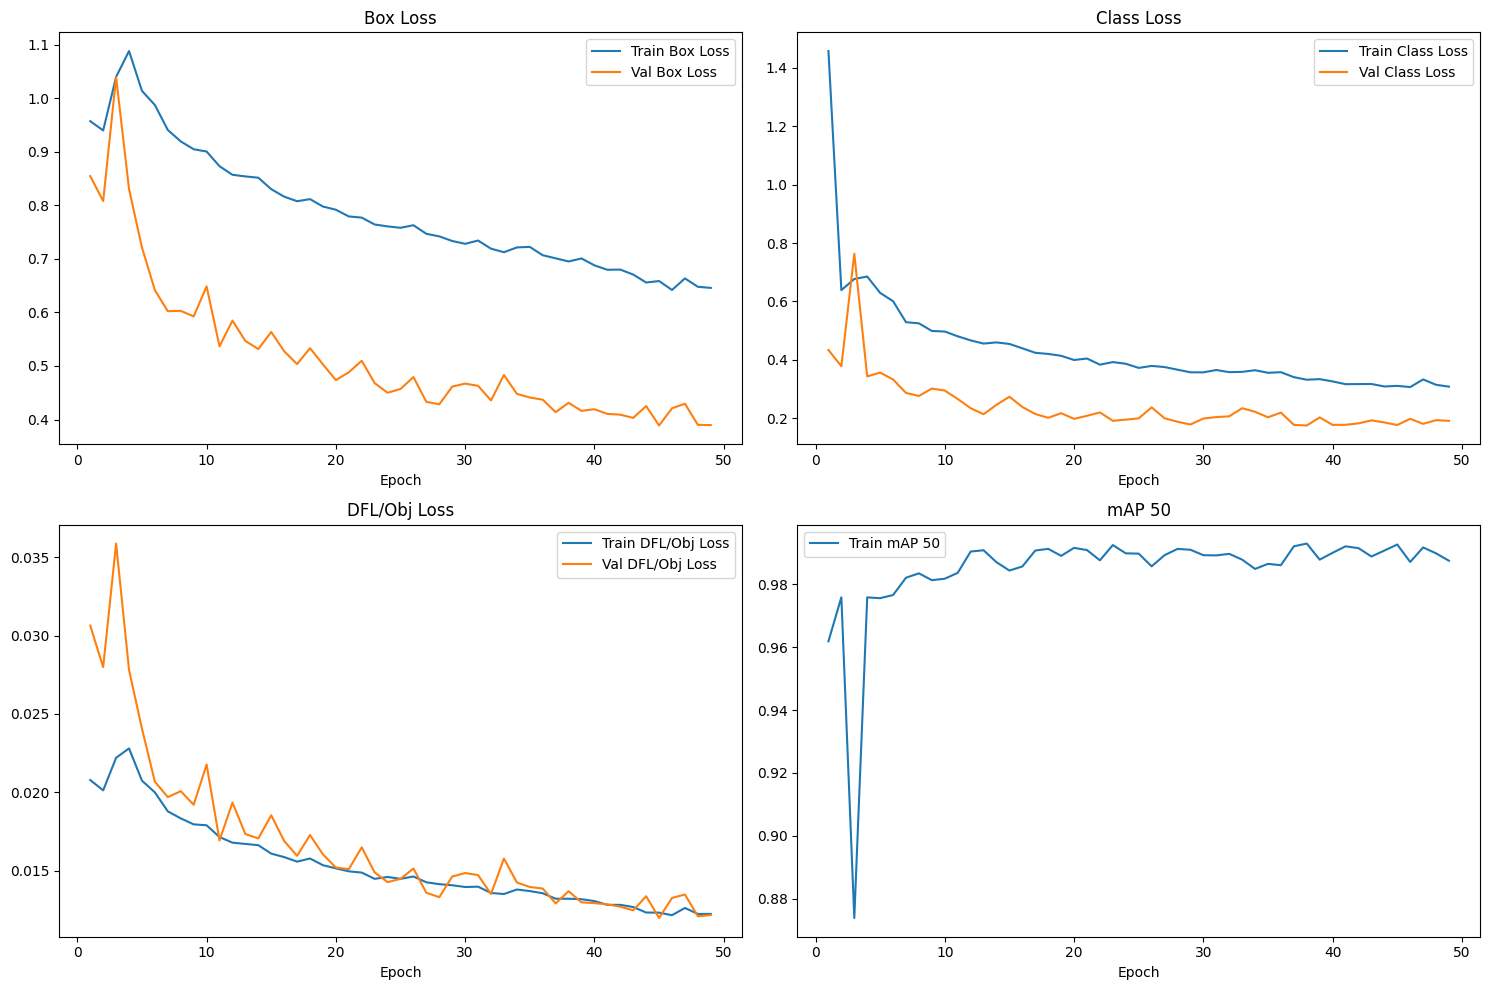

Available columns in your CSV:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2', 'lr/pg3', 'lr/pg4', 'lr/pg5', 'lr/pg6', 'lr/pg7']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('/Users/viduranayanawickrama/Downloads/results.csv')

# 2. Clean column names (YOLO CSVs often have leading/trailing spaces)
df.columns = [c.strip() for c in df.columns]

# 3. Identify available columns dynamically
def find_col(keywords):
    for col in df.columns:
        if all(k.lower() in col.lower() for k in keywords):
            return col
    return None

# Mapping common metrics
metrics = {
    'Box Loss': (find_col(['train', 'box']), find_col(['val', 'box'])),
    'Class Loss': (find_col(['train', 'cls']), find_col(['val', 'cls'])),
    'DFL/Obj Loss': (find_col(['train', 'dfl']) or find_col(['train', 'obj']), 
                    find_col(['val', 'dfl']) or find_col(['val', 'obj'])),
    'mAP 50': (find_col(['metrics', 'mAP50(B)']), None)
}

# 4. Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (label, (train_col, val_col)) in enumerate(metrics.items()):
    if train_col and train_col in df.columns:
        axs[i].plot(df['epoch'], df[train_col], label=f'Train {label}')
    if val_col and val_col in df.columns:
        axs[i].plot(df['epoch'], df[val_col], label=f'Val {label}')
    
    axs[i].set_title(label)
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

plt.tight_layout()
plt.savefig('yolo_improved_results.png')
plt.show()

# Print columns so you can see exactly what is in your file
print("Available columns in your CSV:")
print(df.columns.tolist())

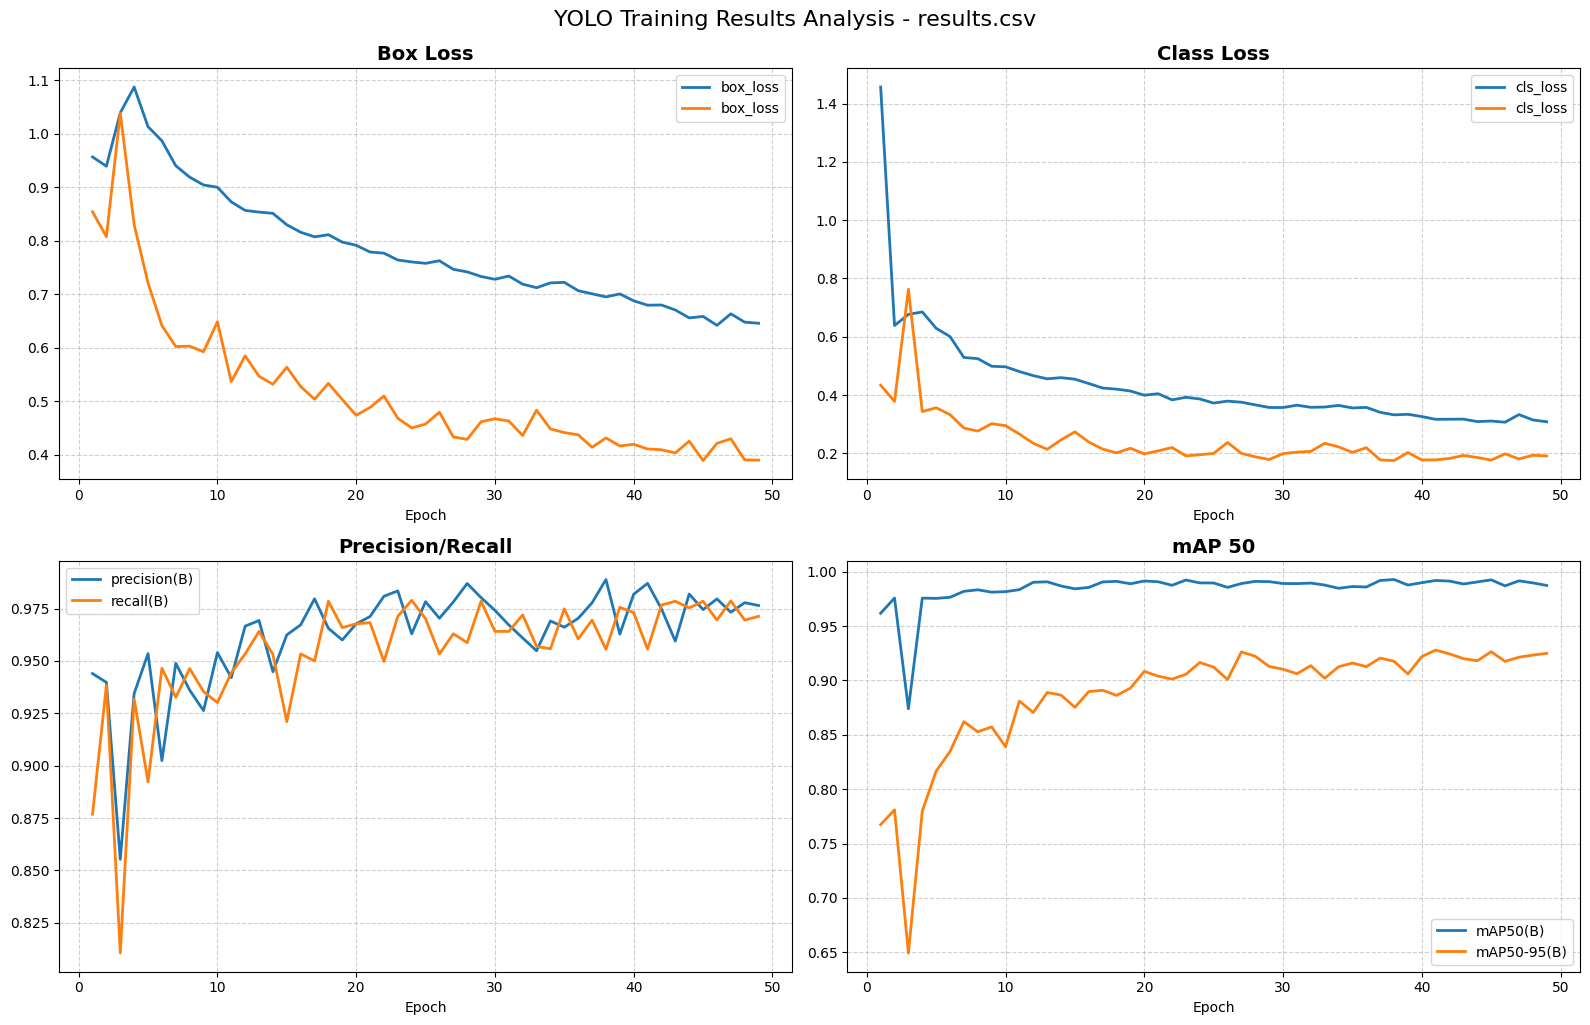

Total Epochs: 49
Best mAP@50: 0.99287


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Update the path to your actual file
file_path = '/Users/viduranayanawickrama/Downloads/results.csv'

if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    # 2. Load and clean headers (strips leading/trailing spaces)
    df = pd.read_csv(file_path)
    df.columns = [c.strip() for c in df.columns]

    # 3. Define mapping for columns (handles different YOLO versions)
    def find_best_col(options):
        for opt in options:
            if opt in df.columns:
                return opt
        return None

    metrics_to_plot = {
        'Box Loss': (find_best_col(['train/box_loss']), find_best_col(['val/box_loss'])),
        'Class Loss': (find_best_col(['train/cls_loss']), find_best_col(['val/cls_loss'])),
        'Precision/Recall': (find_best_col(['metrics/precision(B)']), find_best_col(['metrics/recall(B)'])),
        'mAP 50': (find_best_col(['metrics/mAP50(B)']), find_best_col(['metrics/mAP50-95(B)']))
    }

    # 4. Create Subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    axs = axs.ravel()

    for i, (title, (col1, col2)) in enumerate(metrics_to_plot.items()):
        if col1:
            axs[i].plot(df['epoch'], df[col1], label=col1.split('/')[-1], linewidth=2)
        if col2:
            axs[i].plot(df['epoch'], df[col2], label=col2.split('/')[-1], linewidth=2)
        
        axs[i].set_title(title, fontsize=14, fontweight='bold')
        axs[i].set_xlabel('Epoch')
        axs[i].grid(True, linestyle='--', alpha=0.6)
        axs[i].legend()

    plt.tight_layout()
    plt.suptitle(f"YOLO Training Results Analysis - {os.path.basename(file_path)}", fontsize=16, y=1.02)
    plt.show()

    # Summary Statistics
    best_map = df[metrics_to_plot['mAP 50'][0]].max() if metrics_to_plot['mAP 50'][0] else "N/A"
    print(f"Total Epochs: {len(df)}")
    print(f"Best mAP@50: {best_map}")

/var/folders/6d/ykg27r4j2cv0lnr8vz4s2jjw0000gn/T/ipykernel_59573/2136025747.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


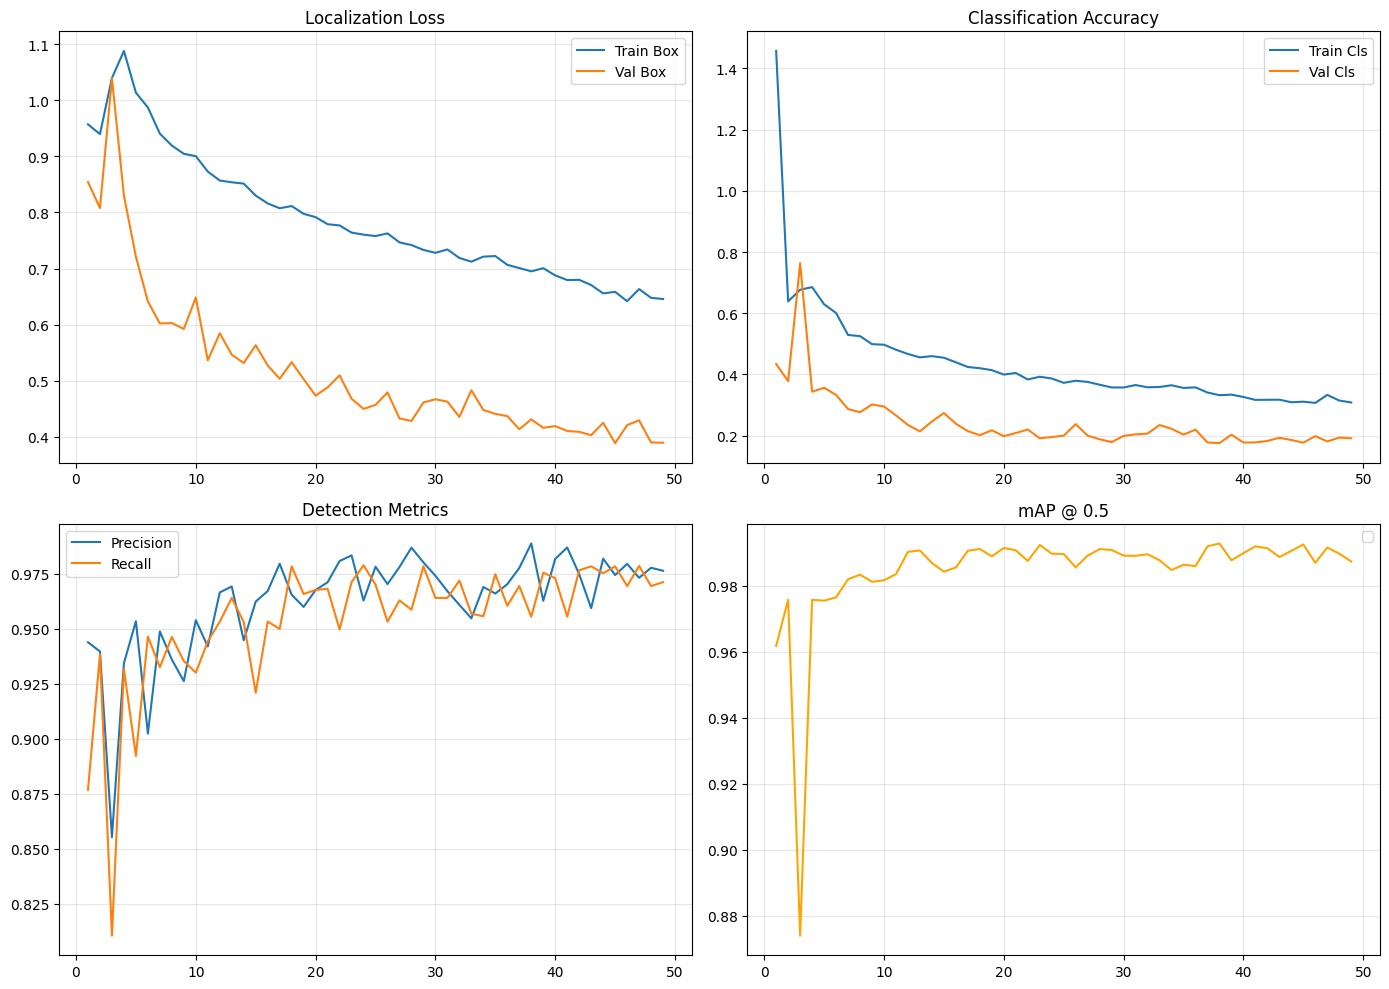

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your specific file
path = '/Users/viduranayanawickrama/Downloads/results.csv'
df = pd.read_csv(path)

# Clean headers (removes the annoying spaces)
df.columns = [c.strip() for c in df.columns]

# Helper to find columns even if names vary slightly
def get_col(options):
    for opt in options:
        if opt in df.columns: return opt
    return None

# Setup 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

# Plot 1: Box Loss
axs[0].plot(df['epoch'], df[get_col(['train/box_loss'])], label='Train Box')
axs[0].plot(df['epoch'], df[get_col(['val/box_loss'])], label='Val Box')
axs[0].set_title('Localization Loss')

# Plot 2: Classification Loss
axs[1].plot(df['epoch'], df[get_col(['train/cls_loss'])], label='Train Cls')
axs[1].plot(df['epoch'], df[get_col(['val/cls_loss'])], label='Val Cls')
axs[1].set_title('Classification Accuracy')

# Plot 3: Precision & Recall
axs[2].plot(df['epoch'], df[get_col(['metrics/precision(B)'])], label='Precision')
axs[2].plot(df['epoch'], df[get_col(['metrics/recall(B)'])], label='Recall')
axs[2].set_title('Detection Metrics')

# Plot 4: mAP (Mean Average Precision)
axs[3].plot(df['epoch'], df[get_col(['metrics/mAP50(B)', 'metrics/mAP_0.5'])], color='orange')
axs[3].set_title('mAP @ 0.5')

for ax in axs:
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()